# Analysis of article links within Wikipedia categories

## Network project Notebook

Nina Varchavsky--Bergin

# Introduction

As a French student studying Digital Science in English, I often use Wikipedia as a way to translate technical terms by switching from on language page to another.
However, Wikipedia is mostly decentralized and language-community-driven. It has been shown previously that culture impact the content of the articles [1][2][3] and behavious of contributors [4]. Then, could the network structure of category articles could also be impacted by culture?

Here I analyse the similarities and differences of the structure of wikipedia articles within one category in French and English, respectively Apprentissage Automatique et Machine Learning.

We will start by describing the data collection and the dataset, then we will have a look at the properties for the French Network and the English Network.

------

[1] Fujiwara, Yuya, Yu Suzuki, Yukio Konishi, et Akiyo Nadamoto. « Extracting Difference Information from Multilingual Wikipedia ». In Web Technologies and Applications, édité par Quan Z. Sheng, Guoren Wang, Christian S. Jensen, et Guandong Xu, 496‑503. Lecture Notes in Computer Science. Berlin, Heidelberg: Springer, 2012. https://doi.org/10.1007/978-3-642-29253-8_42.

[2] Massa, Paolo, et Federico Scrinzi. « Manypedia:ComparingLanguagePointsof Viewof Wikipedia Communities », s. d., 9. https://www.opensym.org/ws2012/p13wikisym2012.pdf

[3] Pfeil, Ulrike, Panayiotis Zaphiris, et Chee Siang Ang. « Cultural Differences in Collaborative Authoring of Wikipedia ». Journal of Computer-Mediated Communication 12, nᵒ 1 (1 octobre 2006): 88‑113. https://doi.org/10.1111/j.1083-6101.2006.00316.x.

[4] Nemoto, Keiichi, et Peter A. Gloor. « Analyzing Cultural Differences in Collaborative Innovation Networks by Analyzing Editing Behavior in Different-Language Wikipedias ». Procedia - Social and Behavioral Sciences, The 2nd Collaborative Innovation Networks Conference - COINs2010, 26 (1 janvier 2011): 180‑90. https://doi.org/10.1016/j.sbspro.2011.10.574.


_____

# Dataset description

## Data collection

Scraped from wikipedia using the WikiCatScrap class from wpnetwork (dependancy: [wptools](https://github.com/siznax/wptools)).

## Dataset description

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from wpnetwork import WikiNet

# plt.rcParams.update({'font.size': 13})

### Loading

In [2]:
# French
wiki_fr = pd.read_csv('data/machine_learning/fr_pages.csv', index_col=0)
links_fr = pd.read_csv('data/machine_learning/fr_links.csv', index_col=0)
#English
wiki_en = pd.read_csv('data/machine_learning/en_pages.csv', index_col=0)
links_en = pd.read_csv('data/machine_learning/en_links.csv', index_col=0)
#Links between French and English
en_fr = pd.read_csv('data/machine_learning/en_fr.csv', index_col=0)

### Structure of the dataset

For each language and category:
- DataFrame with wikipedia pages and metadata
    - Id, title, content of the page, summary of the article, URL, length of the article, links to other pages, last modification date, wikibase number, wikidata URL, aliases
- DataFrame with links between pages
    - Source id, Target id

For each category:
- DataFrame with page links between Frecn wikipedia and English wikipedia 
    - French title, wikidata id, English title

In [3]:
wiki_fr.head()

,Id,title,content,summary,url,length,links,modification,wikibase,wikidata_url,aliases
0,3984464,AdaBoost,"{'requests': ['query', 'parse', 'wikidata', 'l...","AdaBoost est, en intelligence artificielle et ...",https://fr.wikipedia.org/wiki/AdaBoost,5584,"['Apprentissage automatique', 'Arbre de décisi...","{'page': '2019-11-27T15:29:53Z', 'wikidata': '...",Q2823869,https://www.wikidata.org/wiki/Q2823869,"['Adaboost', 'RealBoost']"
1,8764482,Adaptation de domaine,"{'requests': ['query', 'parse', 'wikidata', 'r...",L'adaptation de domaine est un champ de recher...,https://fr.wikipedia.org/wiki/Adaptation_de_do...,7314,"['Apprentissage automatique', 'Apprentissage p...","{'page': '2019-11-29T21:32:27Z', 'wikidata': '...",Q19246213,https://www.wikidata.org/wiki/Q19246213,NaN
2,749070,Algorithme C4.5,"{'requests': ['query', 'parse', 'wikidata', 'l...",L’algorithme C4.5 est un algorithme de classif...,https://fr.wikipedia.org/wiki/Algorithme_C4.5,2100,"['Algorithme ID3', 'Algorithmique', 'Anglais',...","{'page': '2019-11-28T09:39:11Z', 'wikidata': '...",Q1022655,https://www.wikidata.org/wiki/Q1022655,['C4.5']
3,5820420,Algorithme d'apprentissage incrémental,"{'requests': ['query', 'parse', 'wikidata', 'l...","En informatique, un algorithme d'apprentissage...",https://fr.wikipedia.org/wiki/Algorithme_d'app...,4277,"['Adversary (online algorithm)', 'Algorithme',...","{'page': '2019-11-27T15:41:11Z', 'wikidata': '...",Q7094097,https://www.wikidata.org/wiki/Q7094097,NaN
4,2715745,Algorithme de Baum-Welch,"{'requests': ['query', 'parse', 'wikidata', 'l...",L'algorithme de Baum-Welch est un algorithme u...,https://fr.wikipedia.org/wiki/Algorithme_de_Ba...,5289,"['Algorithme', 'Algorithme espérance-maximisat...","{'page': '2019-11-28T09:45:33Z', 'wikidata': '...",Q811478,https://www.wikidata.org/wiki/Q811478,NaN


In [4]:
links_fr.head()

,Source,Target
0,3984464,31947
1,3984464,7946436
2,3984464,178408
4,3984464,11481966
11,8764482,31947


In [5]:
en_fr.head()

,title_fr,wikibase,title_en
0,Adaptation de domaine,Q19246213,Domain adaptation
1,Analyse formelle de concepts,Q1437394,Formal concept analysis
2,Apprentissage actif,Q4677561,Active learning (machine learning)
3,Apprentissage automatique,Q2539,Machine learning
4,Apprentissage basé sur l'explication,Q133580,Explanation-based learning


# Comparaison of the French and English networks properties

### French

##### Network construction

In [6]:
network_fr = WikiNet(wiki_fr, links_fr)

In [7]:
# network_fr.show_graph()

##### Number of nodes, edges and average degree 

In [9]:
network_fr.info()

Type: DiGraph
Number of nodes: 124
Number of edges: 1063
Average in degree:   8.5726
Average out degree:   8.5726
Average total degree: 17.1452


##### Degree distribution

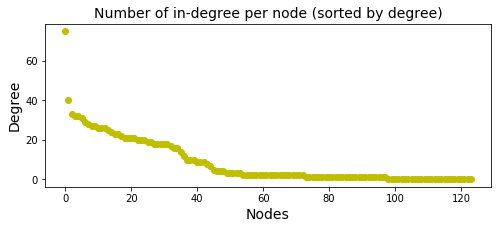

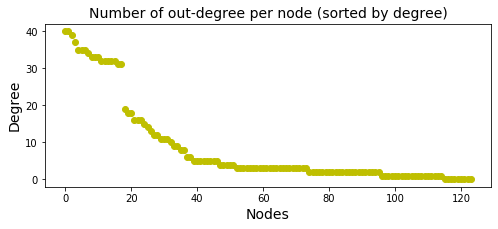

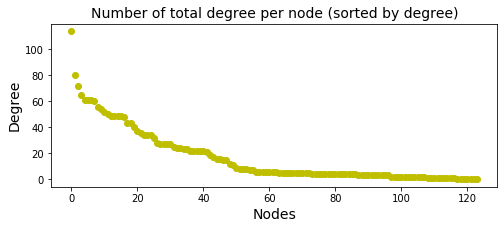

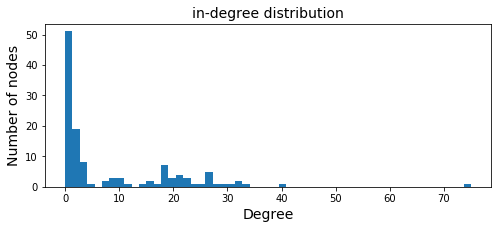

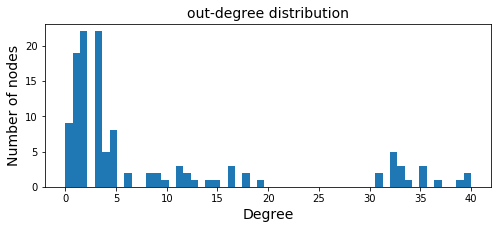

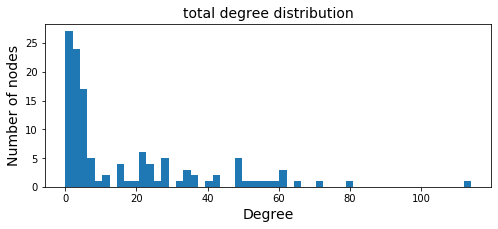

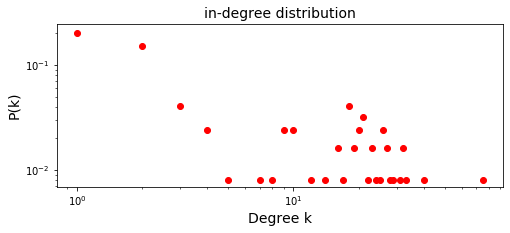

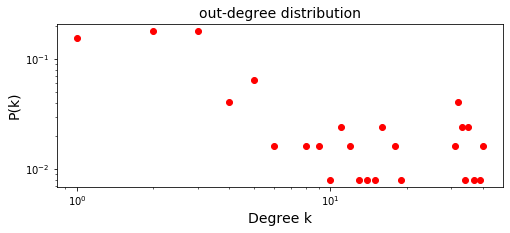

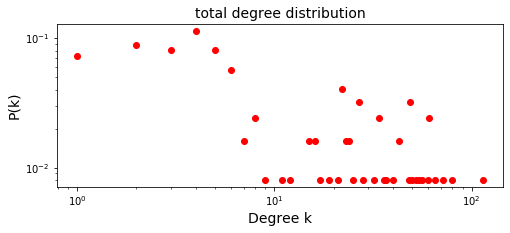

In [10]:
network_fr.plot_degree_dist(kind='all')

In [11]:
# matrix in-out TODO

In [58]:
top_degree = pd.DataFrame(sorted([[d, n] for n, d in network_fr.graph.in_degree()], reverse=True)[:10], columns=['degree', 'Id'])
pd.merge(top_degree, network_fr.pages)[['title', 'degree']]

,title,degree
0,Apprentissage automatique,75
1,Réseau de neurones artificiels,40
2,TensorFlow,33
3,Keras,32
4,Apprentissage supervisé,32
5,Theano (logiciel),31
6,Méthode des k plus proches voisins,29
7,Apprentissage non supervisé,28
8,Microsoft Cognitive Toolkit,27
9,Scikit-learn,27


In [65]:
bottom_degree = pd.DataFrame(sorted([[d, n] for n, d in network_fr.graph.in_degree()], reverse=False)[:27], columns=['degree', 'Id'])
pd.merge(bottom_degree, network_fr.pages)[['title', 'degree']]

,title,degree
0,Modèle de mélange gaussien,0
1,Méthode de l'entropie croisée,0
2,Analyse formelle de concepts,0
3,Ray Solomonoff,0
4,Classification sous contrainte,0
5,SyNAPSE,0
6,Apprentissage basé sur l'explication,0
7,Mémoire temporelle et hiérarchique,0
8,Algorithme du gradient stochastique,0
9,Lasso (statistiques),0


____________

##### Connected components

In [12]:
weak, strong = network_fr.get_connected_components(info=True)

Number of weak connected components: 8
Number of nodes of the smallest weak cc: 1
Number of nodes of the biggest weak cc: 117
Number of weak cc with several nodes: 1
Number of strong connected components: 31
Number of nodes of the smallest weak cc: 1
Number of nodes of the biggest weak cc: 91
Number of strong cc with several nodes: 3


Multi-nodes weak connected components

/home/nina/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/nina/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


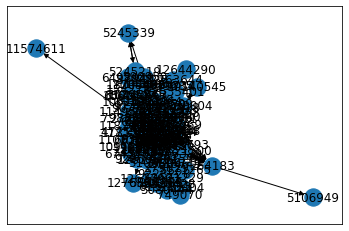

In [13]:
multi_weak = WikiNet.get_multi_nodes(weak)
for w in multi_weak:
    weak_graph = network_fr.get_subgraph(w)
    nx.draw_networkx(weak_graph)
    plt.show()

Multi-nodes strong connected components

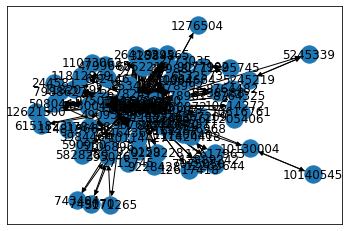

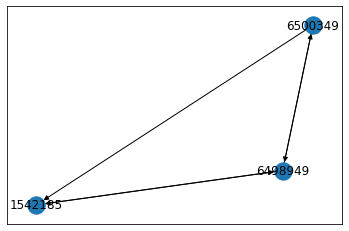

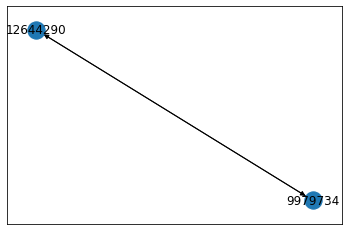

In [14]:
multi_strong = WikiNet.get_multi_nodes(strong)
for s in multi_strong:
    strong_graph = network_fr.get_subgraph(s)
    nx.draw_networkx(strong_graph)
    plt.show()

##### Path and distance

In [15]:
import statistics as stat

Diameter for each multi-nodes strong connected components.

In [16]:
for cc in multi_strong:
    diameter = nx.diameter(network_fr.get_subgraph(cc))
    print('Diameter of the strong cc with {} nodes: {}'.format(len(cc), diameter))

Diameter of the strong cc with 91 nodes: 6
Diameter of the strong cc with 3 nodes: 2
Diameter of the strong cc with 2 nodes: 1


Average Path Length

In [17]:
network_fr.get_avg_path_length(weak, strong)

Average shortest path length in the weak cc with 117 nodes: 1.9620542292956087
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0

Average shortest path length of the 8 weak cc : 0.24525677866195109

--

Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 91 nodes: 2.46007326007326
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 3 nodes: 1.1666666666666667
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path 

In [18]:
network_fr.get_avg_path_length(multi_weak, multi_strong)

Average shortest path length in the weak cc with 117 nodes: 1.9620542292956087

Average shortest path length of the 1 weak cc : 1.9620542292956087

--

Average shortest path length in the strong cc with 91 nodes: 2.46007326007326
Average shortest path length in the strong cc with 3 nodes: 1.1666666666666667
Average shortest path length in the strong cc with 2 nodes: 1.0

Average shortest path length of the 3 strong cc : 1.5422466422466423


Distance distribution

Distance mean: 2.4803464977645304
Distance variance: 0.7821008952983992


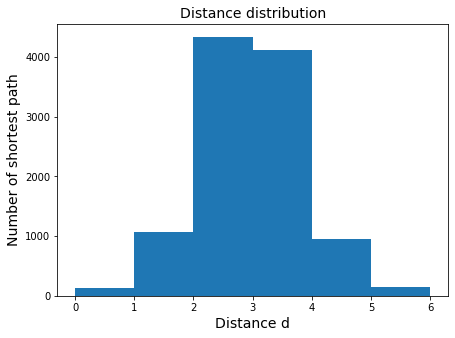

In [19]:
WikiNet.plot_distance_dist(network_fr.graph, figsize=(7,5))

Distance distribution for each connected component

In [20]:
#### A REFAIRE

# for cc in multi_weak:
#     graph = network_fr.get_subgraph(cc)
# #     print(WikiNet.get_distance_dist(graph))
#     WikiNet.plot_distance_dist(graph)
# print('stop')
# for cc in multi_strong:
#     graph = network_fr.get_subgraph(cc)
# #     print(WikiNet.get_distance_dist(graph))
#     WikiNet.plot_distance_dist(network_fr.get_subgraph(cc))

Variance of distance

In [21]:
distances = WikiNet.get_distance_dist(network_fr.graph)
stat.variance(distances) #small world property

0.7821008952983992

Cycles

In [22]:
## Infini

# cycles = []
# for i in nx.simple_cycles(network_fr.graph):
#     if i in cycles:
#         break
#     cycles.append(i)
# print(cycles)

##### Clusters 

Todo : global clustering coeff

Average clustering coefficent

In [23]:
nx.average_clustering(network_fr.graph)

0.5015449911587633

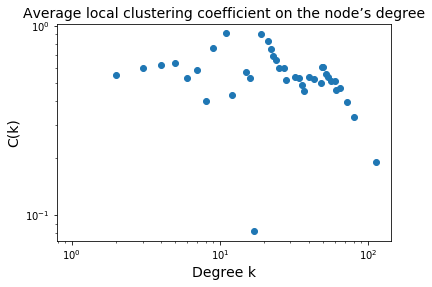

In [24]:
network_fr.plot_clustering_per_degree()

##### Communities (to come)

*****************

### English

In [28]:
network_en = WikiNet(wiki_en, links_en)
network_en.info()

Type: DiGraph
Number of nodes: 216
Number of edges: 1633
Average in degree:   7.5602
Average out degree:   7.5602
Average total degree: 15.1204


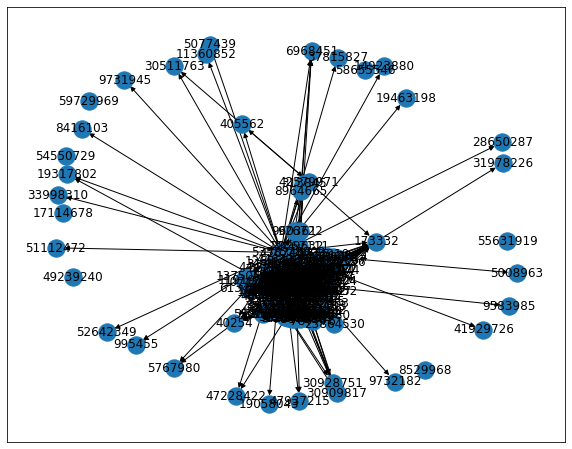

In [29]:
network_en.show_graph()

##### Degree distribution

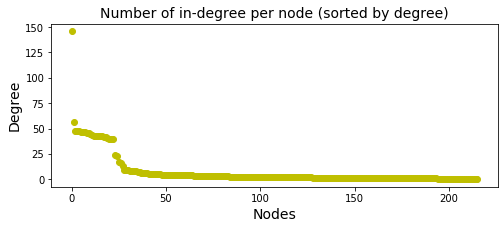

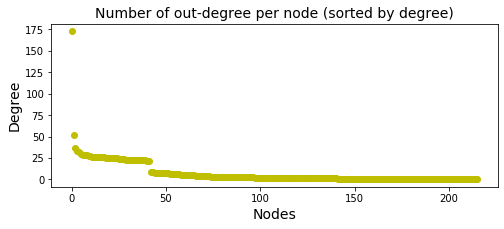

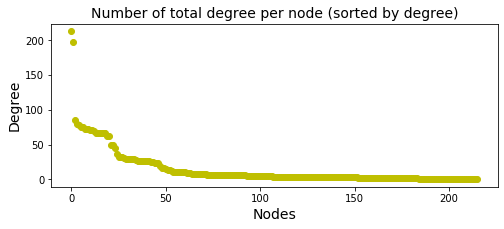

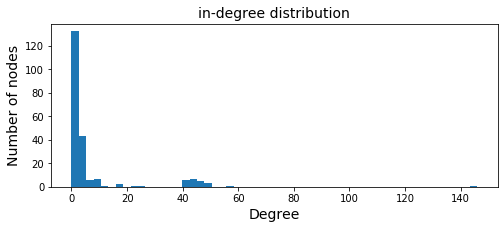

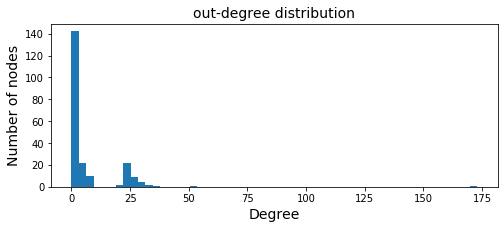

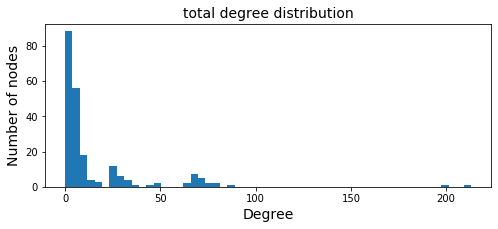

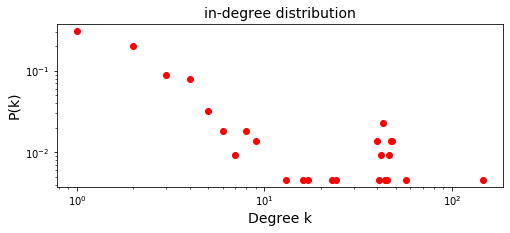

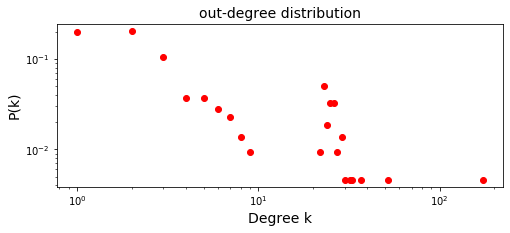

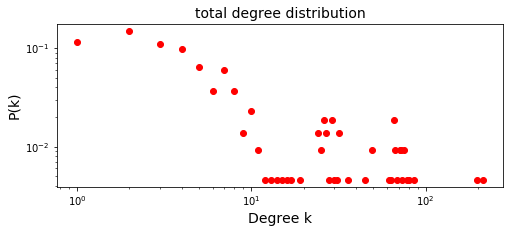

In [30]:
network_en.plot_degree_dist(kind='all')

In [57]:
top_degree = pd.DataFrame(sorted([[d, n] for n, d in network_en.graph.in_degree()], reverse=True)[:10], columns=['degree', 'Id'])
pd.merge(top_degree, network_en.pages)[['title', 'degree']]

,title,degree
0,Machine learning,146
1,Statistical classification,57
2,Convolutional neural network,48
3,Statistical learning theory,48
4,Computational learning theory,48
5,Machine Learning (journal),47
6,Empirical risk minimization,47
7,Unsupervised learning,47
8,Semi-supervised learning,46
9,Dimensionality reduction,46


In [69]:
bottom_degree = pd.DataFrame(sorted([[d, n] for n, d in network_en.graph.in_degree()], reverse=False)[:23], columns=['degree', 'Id'])
pd.merge(bottom_degree, network_en.pages)[['title', 'degree']]

,title,degree
0,Learning automaton,0
1,Bayesian regret,0
2,Center for Biological and Computational Learning,0
3,Multivariate adaptive regression spline,0
4,Proaftn,0
5,Catastrophic interference,0
6,Trax Retail,0
7,VaultML,0
8,Spike-and-slab regression,0
9,Connectionist temporal classification,0


##### Connected Components

In [31]:
weak, strong = network_en.get_connected_components(info=True )

Number of weak connected components: 8
Number of nodes of the smallest weak cc: 1
Number of nodes of the biggest weak cc: 209
Number of weak cc with several nodes: 1
Number of strong connected components: 51
Number of nodes of the smallest weak cc: 1
Number of nodes of the biggest weak cc: 166
Number of strong cc with several nodes: 1


Multi-nodes weak connected components

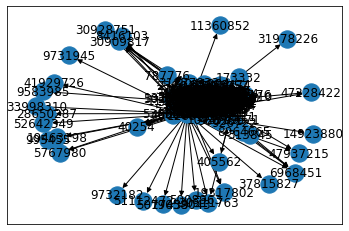

In [32]:
multi_weak = WikiNet.get_multi_nodes(weak)
for w in multi_weak:
    weak_graph = network_en.get_subgraph(w)
    nx.draw_networkx(weak_graph)
    plt.show()

Multi-nodes strong connected components

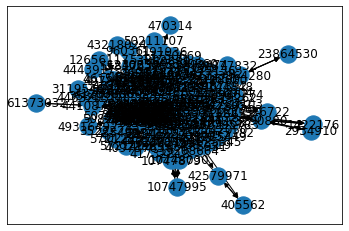

In [33]:
multi_strong = WikiNet.get_multi_nodes(strong)
for s in multi_strong:
    strong_graph = network_en.get_subgraph(s)
    nx.draw_networkx(strong_graph)
    plt.show()

##### Path & distance

Diameter for each multi-nodes strong connected components.

In [34]:
for cc in multi_strong:
    diameter = nx.diameter(network_en.get_subgraph(cc))
    print('Diameter of the strong cc with {} nodes: {}'.format(len(cc), diameter))

Diameter of the strong cc with 166 nodes: 6


Average Path Length

In [35]:
network_en.get_avg_path_length(weak, strong)

Average shortest path length in the weak cc with 209 nodes: 2.110461906514538
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0
Average shortest path length in the weak cc with 1 nodes: 0

Average shortest path length of the 8 weak cc : 0.26380773831431725

--

Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nodes: 0
Average shortest path length in the strong cc with 1 nod

In [36]:
network_en.get_avg_path_length(multi_weak, multi_strong)

Average shortest path length in the weak cc with 209 nodes: 2.110461906514538

Average shortest path length of the 1 weak cc : 2.110461906514538

--

Average shortest path length in the strong cc with 166 nodes: 2.586710478276743

Average shortest path length of the 1 strong cc : 2.586710478276743


Distance distribution

Distance mean: 2.607161125319693
Distance variance: 0.5450395122458563


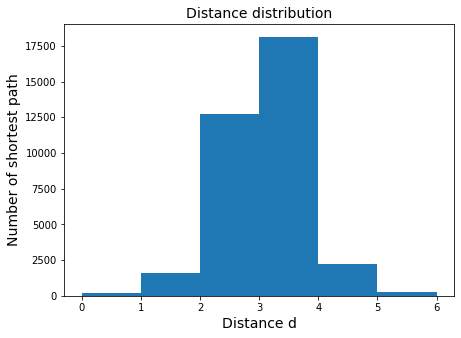

In [37]:
WikiNet.plot_distance_dist(network_en.graph, figsize=(7,5))

Distance distribution for each connected component

Variance of distance

In [38]:
distances = WikiNet.get_distance_dist(network_en.graph)
stat.variance(distances) #small world property

0.5450395122458563

##### Clusters 

Average clustering coefficent

In [39]:
nx.average_clustering(network_en.graph)

0.5320000776378488

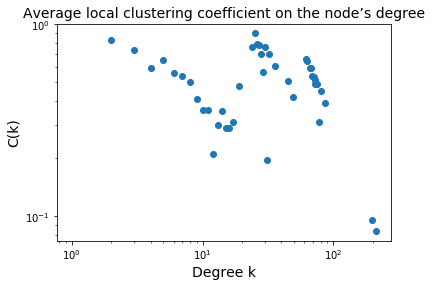

In [40]:
network_en.plot_clustering_per_degree()

In [ ]:
# 3D plot

from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [6,3,6,9,12,24]
y = [3,5,78,12,23,56]

ax.plot(x, y, zs=0, zdir='z', label='zs=0, zdir=z')
ax.view_init(30, 40)
plt.show()